In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import sklearn.metrics as metrics

In [3]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

df = pd.read_csv(url)
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


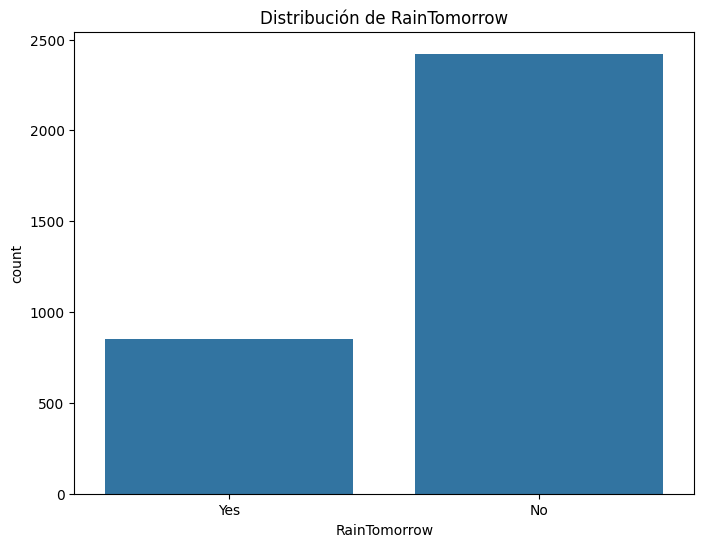

In [4]:
# Visualización de la distribución de la variable 'RainTomorrow'
plt.figure(figsize=(8, 6))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribución de RainTomorrow')
plt.show()

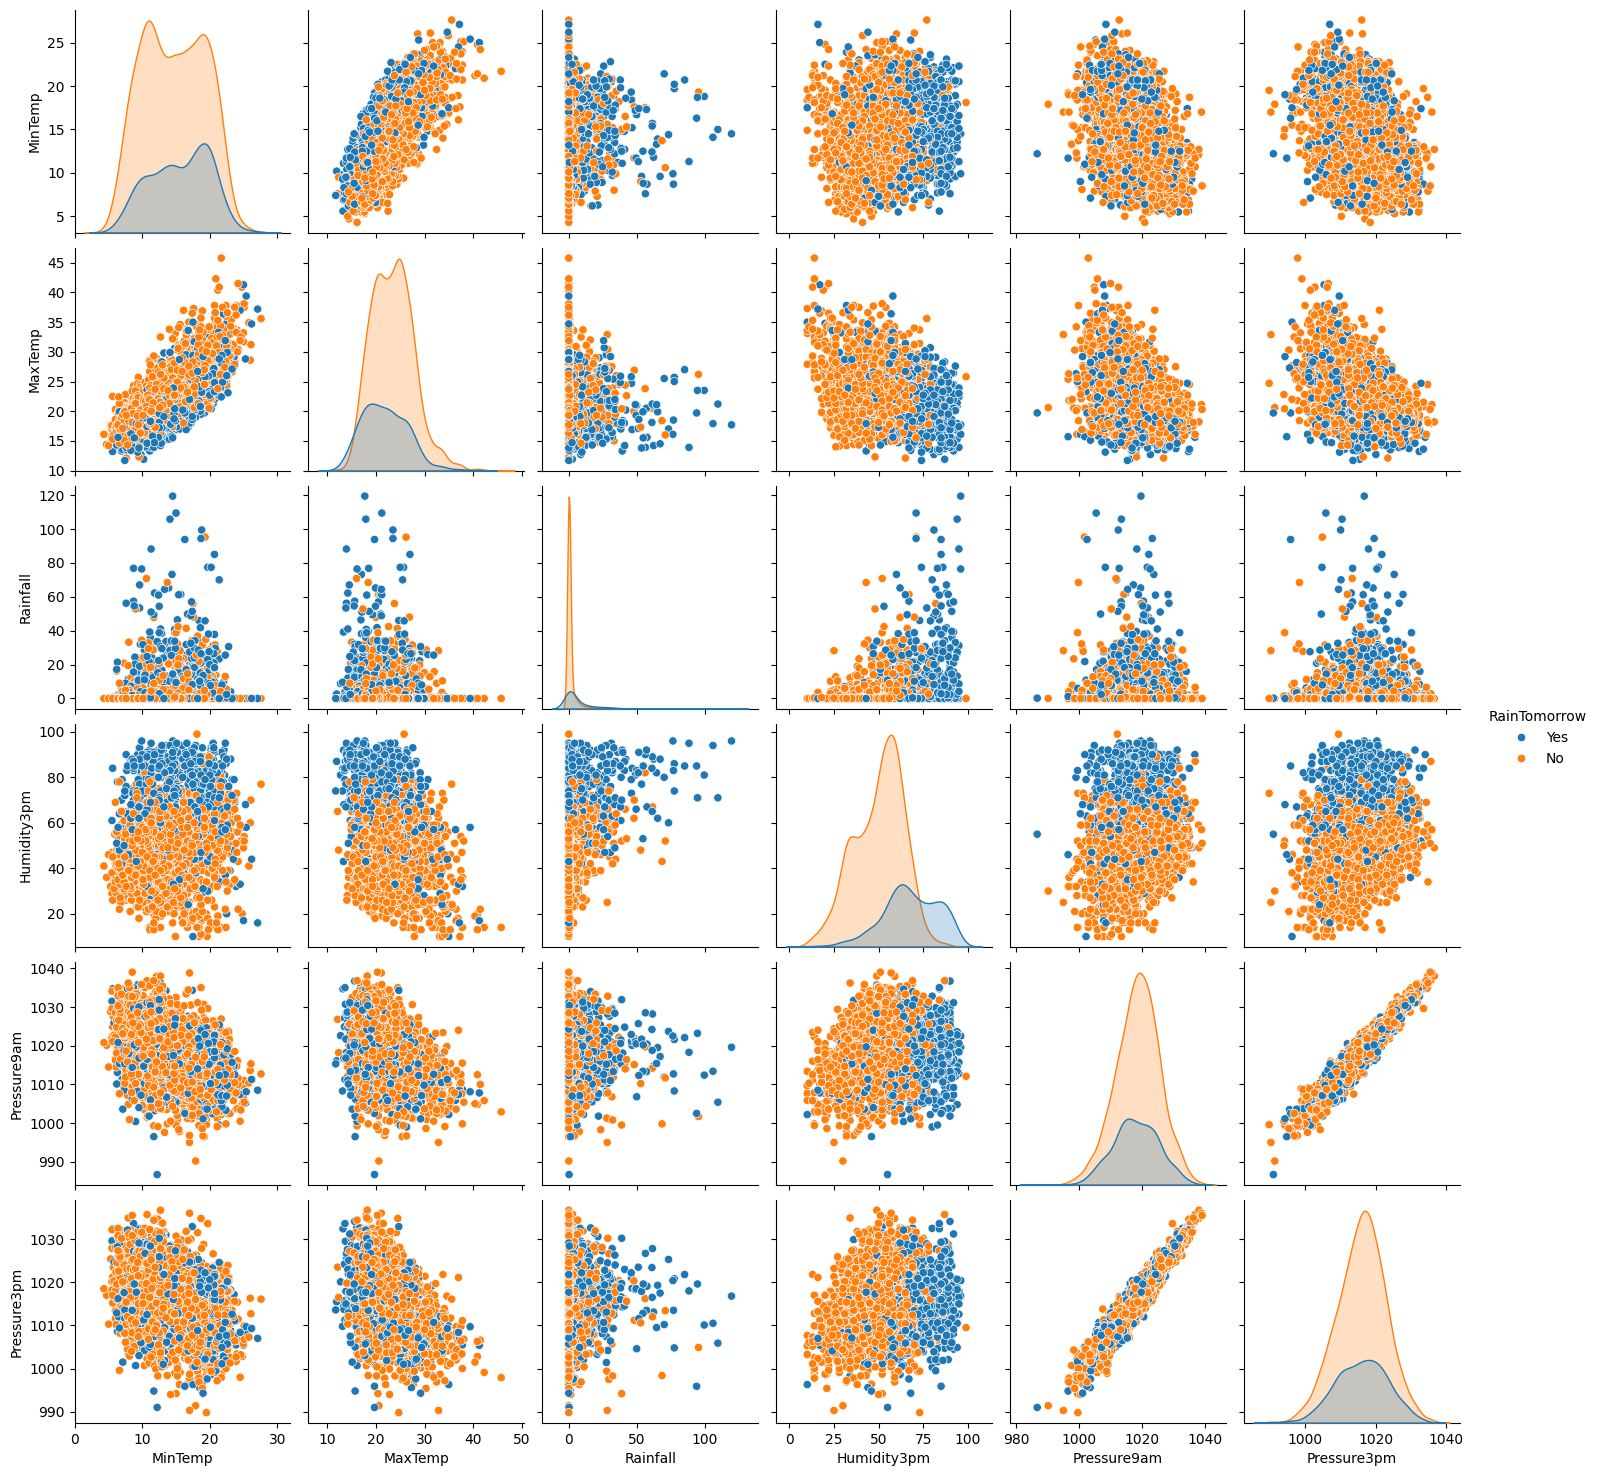

In [5]:
# Visualización de pares de características seleccionadas
selected_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'RainToday', 'RainTomorrow']
sns.pairplot(df[selected_columns], hue='RainTomorrow')
plt.show()

## **Data Preprocessing**
---

In [6]:
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [7]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [8]:
df_sydney_processed.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,False,False,False,False,False,True,False,False,False,False
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,False,False,False,False,False,False,False,False,False,False
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,False,False,False,False,False,False,False,False,False,False
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,False,False,False,False,False,False,False,False,False,False
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,False,False,False,False,False,False,False,True,False,False


In [9]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

df_sydney_processed = df_sydney_processed.astype(float)

In [10]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

X_train.shape, X_test.shape

((2616, 66), (655, 66))

## **Linear Regression**
---

In [17]:
# Regresión Lineal básica
linearReg = LinearRegression()
linearReg.fit(X_train, y_train)
predictions = linearReg.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

LinearRegression_MAE = mean_absolute_error(y_test, predictions)
LinearRegression_MSE = mean_squared_error(y_test, predictions)
LinearRegression_R2 = r2_score(y_test, predictions)

In [19]:
report = pd.DataFrame(columns=["MAE", "MSE", "R2"], data=[[LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]])

report = report.transpose()
report.columns = ['Value']

report

,Value
MAE,0.256318
MSE,0.115721
R2,0.427132


In [20]:
# Grid Search para Ridge Regression
ridge = Ridge()
param_grid_ridge = {'alpha': np.logspace(-3, 3, 7)}
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, scoring='r2')
grid_search_ridge.fit(X_train, y_train)

print("Mejores hiperparámetros para Ridge Regression:", grid_search_ridge.best_params_)
print("Mejor R2 para Ridge Regression:", grid_search_ridge.best_score_)


Mejores hiperparámetros para Ridge Regression: {'alpha': 100.0}
Mejor R2 para Ridge Regression: 0.35349806665823935


In [21]:
# Grid Search para Lasso Regression
lasso = Lasso()
param_grid_lasso = {'alpha': np.logspace(-3, 3, 7)}
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, scoring='r2')
grid_search_lasso.fit(X_train, y_train)

print("Mejores hiperparámetros para Lasso Regression:", grid_search_lasso.best_params_)
print("Mejor R2 para Lasso Regression:", grid_search_lasso.best_score_)

Mejores hiperparámetros para Lasso Regression: {'alpha': 0.001}
Mejor R2 para Lasso Regression: 0.3509463946533221


In [22]:
# Evaluación del mejor modelo Ridge en el conjunto de prueba
best_ridge = grid_search_ridge.best_estimator_
ridge_predictions = best_ridge.predict(X_test)

Ridge_MAE = mean_absolute_error(y_test, ridge_predictions)
Ridge_MSE = mean_squared_error(y_test, ridge_predictions)
Ridge_R2 = r2_score(y_test, ridge_predictions)

print("Ridge Regression - MAE:", Ridge_MAE)
print("Ridge Regression - MSE:", Ridge_MSE)
print("Ridge Regression - R2:", Ridge_R2)

Ridge Regression - MAE: 0.25490111598333093
Ridge Regression - MSE: 0.1146301272872999
Ridge Regression - R2: 0.43253034294016135


In [23]:

# Evaluación del mejor modelo Lasso en el conjunto de prueba
best_lasso = grid_search_lasso.best_estimator_
lasso_predictions = best_lasso.predict(X_test)

Lasso_MAE = mean_absolute_error(y_test, lasso_predictions)
Lasso_MSE = mean_squared_error(y_test, lasso_predictions)
Lasso_R2 = r2_score(y_test, lasso_predictions)

print("Lasso Regression - MAE:", Lasso_MAE)
print("Lasso Regression - MSE:", Lasso_MSE)
print("Lasso Regression - R2:", Lasso_R2)

Lasso Regression - MAE: 0.2547535366076003
Lasso Regression - MSE: 0.11452735455850865
Lasso Regression - R2: 0.4330391132481285


## **KNN**

In [24]:
# Grid Search para KNN
knn_model = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)


c:\Users\AlxMa\.conda\envs\datascience\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\AlxMa\.conda\envs\datascience\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [25]:
print("Mejores hiperparámetros para KNN:", grid_search_knn.best_params_)
print("Mejor puntuación para KNN:", grid_search_knn.best_score_)

Mejores hiperparámetros para KNN: {'n_neighbors': 7, 'weights': 'uniform'}
Mejor puntuación para KNN: 0.8276020609227446


In [26]:
best_knn = grid_search_knn.best_estimator_
best_knn.fit(X_train, y_train)

predictions = best_knn.predict(X_test)

In [27]:
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions)
KNN_F1_Score = f1_score(y_test, predictions)

In [28]:
report = pd.DataFrame(columns=["Accuracy", "Jaccard Index", "F1 Score"], data=[[KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score]])

report = report.transpose()
report.columns = ['Value']

report

,Value
Accuracy,0.833588
Jaccard Index,0.485849
F1 Score,0.653968


<Figure size 800x600 with 0 Axes>

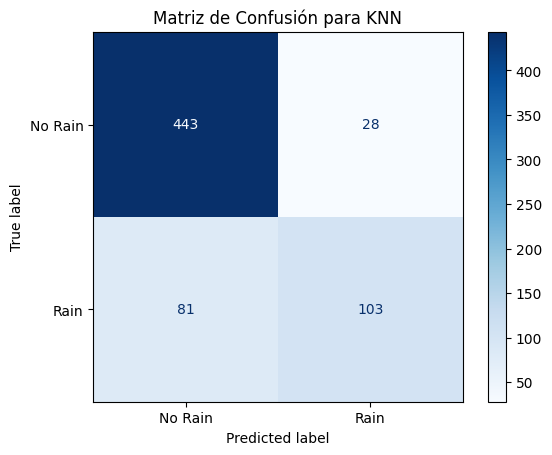

In [29]:
# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Visualización de la Matriz de Confusión
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(conf_matrix, display_labels=['No Rain', 'Rain']).plot(cmap='Blues')
plt.title('Matriz de Confusión para KNN')
plt.show()

## **Decision Tree**
---

In [30]:
# Grid Search para Decision Tree
tree_model = DecisionTreeClassifier()
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [31]:
print("Mejores hiperparámetros para Decision Tree:", grid_search_tree.best_params_)
print("Mejor puntuación para Decision Tree:", grid_search_tree.best_score_)

Mejores hiperparámetros para Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Mejor puntuación para Decision Tree: 0.7981704202122224


In [32]:
best_tree = grid_search_tree.best_estimator_
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10)

In [33]:
predictions = best_tree.predict(X_test)

In [34]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions)
Tree_F1_Score = f1_score(y_test, predictions)

In [35]:
report = pd.DataFrame(columns=["Accuracy", "Jaccard Index", "F1 Score"], data=[[Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score]])

report = report.transpose()
report.columns = ['Value']

report

,Value
Accuracy,0.787786
Jaccard Index,0.425620
F1 Score,0.597101


<Figure size 800x600 with 0 Axes>

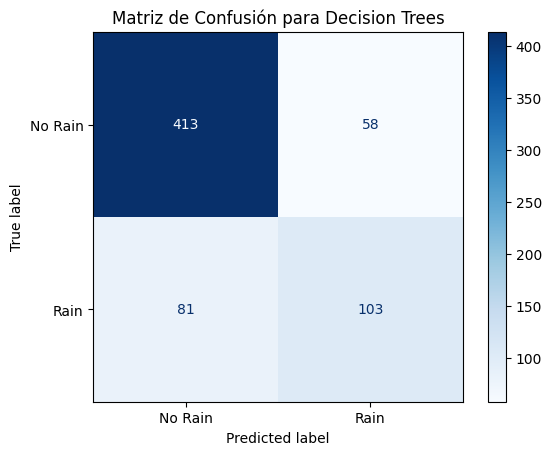

In [36]:
# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Visualización de la Matriz de Confusión
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(conf_matrix, display_labels=['No Rain', 'Rain']).plot(cmap='Blues')
plt.title('Matriz de Confusión para Decision Trees')
plt.show()

## **Logistic Regression**
---

In [37]:
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

In [38]:
LR = LogisticRegression(solver='liblinear')

LR.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [40]:
predictions = LR.predict(X_test)

In [41]:
predict_proba = LR.predict_proba(X_test)

In [42]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions)
LR_F1_Score = f1_score(y_test, predictions)
LR_Log_Loss = log_loss(y_test, predict_proba)

In [43]:
report = pd.DataFrame(columns=["Accuracy", "Jaccard Index", "F1 Score", "Log Loss"], data=[[LR_Accuracy_Score, LR_JaccardIndex, LR_F1_Score, LR_Log_Loss]])

report = report.transpose()
report.columns = ['Value']

report

,Value
Accuracy,0.836641
Jaccard Index,0.509174
F1 Score,0.674772
Log Loss,0.380451


## **SVM**
---

In [12]:
# Grid Search para SVM
svm_model = SVC()
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy', verbose=2)
grid_search_svm.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.2s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   2.1s
[CV] END .................................C=1, ke

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [13]:
best_svm = grid_search_svm.best_estimator_
best_svm.fit(X_train, y_train)

predictions = best_svm.predict(X_test)

In [14]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions)
SVM_F1_Score = f1_score(y_test, predictions)

In [15]:
report = pd.DataFrame(columns=["Accuracy", "Jaccard Index", "F1 Score"], data=[[SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score]])

report = report.transpose()
report.columns = ['Value']

report

,Value
Accuracy,0.841221
Jaccard Index,0.507109
F1 Score,0.672956


<Figure size 800x600 with 0 Axes>

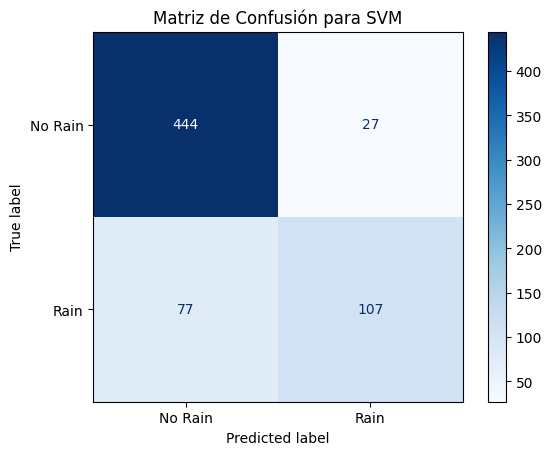

In [16]:
# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Visualización de la Matriz de Confusión
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(conf_matrix, display_labels=['No Rain', 'Rain']).plot(cmap='Blues')
plt.title('Matriz de Confusión para SVM')
plt.show()

## **Report**
---

In [44]:
data = [[KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score, None],
       [Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score, None],
       [LR_Accuracy_Score, LR_JaccardIndex, LR_F1_Score, LR_Log_Loss],
       [SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score, None],]

In [45]:
report = pd.DataFrame(columns=["Accuracy", "Jaccard Index", "F1 Score", "Log Loss"], data=data)

report = report.transpose()
report.columns = ['Value']*4

report

,Value,Value,Value,Value
Accuracy,0.833588,0.787786,0.836641,0.841221
Jaccard Index,0.485849,0.425620,0.509174,0.507109
F1 Score,0.653968,0.597101,0.674772,0.672956
Log Loss,NaN,NaN,0.380451,NaN


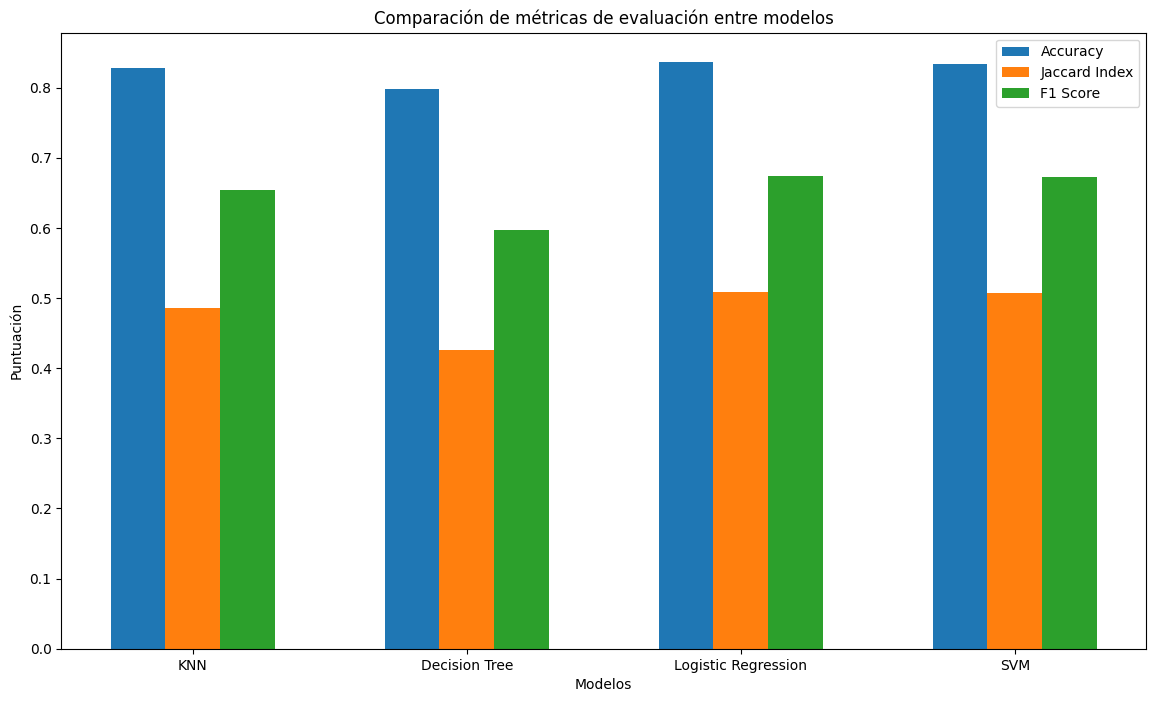

In [47]:
# Comparación de métricas entre modelos
model_names = ['KNN', 'Decision Tree', 'Logistic Regression', 'SVM']
accuracy_scores = [grid_search_knn.best_score_, grid_search_tree.best_score_, 0.836641, grid_search_svm.best_score_]
jaccard_indices = [0.485849,	0.425620,	0.509174,	0.507109]  # Placeholder
f1_scores = [0.653968,	0.597101,	0.674772,	0.672956]  # Placeholder

x = np.arange(len(model_names))

plt.figure(figsize=(14, 8))
plt.bar(x - 0.2, accuracy_scores, width=0.2, label='Accuracy')
plt.bar(x, jaccard_indices, width=0.2, label='Jaccard Index')
plt.bar(x + 0.2, f1_scores, width=0.2, label='F1 Score')

plt.xticks(x, model_names)
plt.xlabel('Modelos')
plt.ylabel('Puntuación')
plt.title('Comparación de métricas de evaluación entre modelos')
plt.legend()
plt.show()